# DATA 622 Assignment 2

Erick Hadi

The dataset used for this assignment is the Portugese Bank Marketing dataset. The goal of the dataset is to predict whether a client will subscribe to a term deposit after being contacted. This means this problem is a supervised classification, specifically a binary classification task. Also the nature of the data as was discovered in the previous assignment shows that Tree based models may perform the best on this data. The dataset has many categorical and non linear relationships, some features have different scales and ranges, and in general ensemble methods can reduce overfitting and improve accuracy. With this in mind Decision Tree, Random Forest, Adaboost, and a special algorithm will be trained and evaluated to see which is the most accurate in predicting subscription.  

## Import modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report


## Load Data (Data is from Assignmnet 1 where it was preprocessed )

In [2]:
file_path = "bank-additional-full-cleaned.csv"
data = pd.read_csv(file_path)

In [3]:
data.head()

,Unnamed: 0,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,cons_price_idx,cons_conf_idx,euribor3m,y,contacted_before,has_credit_risk
0,0,56,housemaid,married,basic.4y,no,no,no,telephone,may,...,1,NaN,0,nonexistent,93.994,-36.4,4.857,no,0,0
1,1,57,services,married,high.school,NaN,no,no,telephone,may,...,1,NaN,0,nonexistent,93.994,-36.4,4.857,no,0,0
2,2,37,services,married,high.school,no,yes,no,telephone,may,...,1,NaN,0,nonexistent,93.994,-36.4,4.857,no,0,1
3,3,40,admin.,married,basic.6y,no,no,no,telephone,may,...,1,NaN,0,nonexistent,93.994,-36.4,4.857,no,0,0
4,4,56,services,married,high.school,no,no,yes,telephone,may,...,1,NaN,0,nonexistent,93.994,-36.4,4.857,no,0,1


## Split the dataset

In [4]:
y = data['y'].map({'yes': 1, 'no': 0})
X = data.drop(columns=['y'])

X = pd.get_dummies(X, drop_first=True)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

## Helper Function for model evaluation (This function was generated with the help of an LLM)

The goal of the evaluation metrics is to measure how well a model predicts the target variable. In this case, Accuracy, Precision, Recall, F1-Score, and AUC-ROC will be measured for each of the algorithms tested. This is to measure overall correctness, qaulity of positive predictions, coverage of actual positives, balance between precision and recall, and ranking ability respectively.

In [6]:
def evaluate_model(model, X_test, y_test, model_name):
    """Compute and print key evaluation metrics."""
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None

    print(f"=== {model_name} Evaluation ===")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1-score: {f1:.4f}")
    if auc: print(f"AUC-ROC: {auc:.4f}")
    print("-"*40)

    return {'model': model_name, 'accuracy': acc, 'precision': prec, 'recall': rec, 'f1': f1, 'auc': auc}

## Decision Trees (Base Model)

The first model is Decision Tree - Base Model. This model is very interpretable as it operates like a flowchart of decision. It handles mixed features types and captures non linear relationships effectively and is also non parametric. However it may be prone to overfitting.

In [7]:
dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X_train, y_train)

res_dt1 = evaluate_model(dt1, X_test, y_test, "Decision Tree - Baseline")

=== Decision Tree - Baseline Evaluation ===
Accuracy: 0.8877
Precision: 0.5016
Recall: 0.5194
F1-score: 0.5103
AUC-ROC: 0.7269
----------------------------------------


## Decision Tree (Tuned)

To reduce the risk of overfitting and find the best bias-variance tradeoff the decision tree should be tuned. By setting different parameters a "sweet spot" can be found by building a tree complex enough to learn pattersn but simple enough to be able to generalize.



In [8]:
params = {'max_depth': [4, 6, 8, 10], 'min_samples_split': [2, 5, 10]}
grid_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), params, cv=5, scoring='f1')
grid_dt.fit(X_train, y_train)

best_dt = grid_dt.best_estimator_
res_dt2 = evaluate_model(best_dt, X_test, y_test, "Decision Tree - Tuned")


=== Decision Tree - Tuned Evaluation ===
Accuracy: 0.9200
Precision: 0.6801
Recall: 0.5474
F1-score: 0.6066
AUC-ROC: 0.9401
----------------------------------------


## Random Forest (Base Model)

Random Forest is an esemble learning algorithm that builds many decision trees each trained on slighlty different subsets of the data and features. Then it averaged their predicitons or takes a majority vote for classification to put simply. So instead of relying on a single possibly noisy tree the forest combines multiple diverse trees to make more stable and accurate predictions.

In [9]:
rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X_train, y_train)

res_rf1 = evaluate_model(rf1, X_test, y_test, "Random Forest - Baseline")

=== Random Forest - Baseline Evaluation ===
Accuracy: 0.9184
Precision: 0.6957
Recall: 0.4903
F1-score: 0.5752
AUC-ROC: 0.9487
----------------------------------------


## Random Forest (Tuned)

Again if a model is overfitting and not performing as well then it should be fine tuned. So different number of trees in the forest and the depth of the trees are experimented to see which paramters give the best results. It is important to understand that although more trees can make a mode more stable and robust it can significantly increase computation time and resource while not improving performance.

In [10]:
params_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [15, 20, 25],
}
grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), params_rf, cv=3, scoring='f1')
grid_rf.fit(X_train, y_train)

best_rf = grid_rf.best_estimator_
res_rf2 = evaluate_model(best_rf, X_test, y_test, "Random Forest - Tuned")

=== Random Forest - Tuned Evaluation ===
Accuracy: 0.9206
Precision: 0.7082
Recall: 0.5022
F1-score: 0.5876
AUC-ROC: 0.9498
----------------------------------------


## AdaBoost (Base Model)

Adaboost, Adaptive Boosting, is a boosting algorithm that builds an esemble of weak learners in sequence. Which are small decision trees, stumps, with each new tree focusing on fixing the mistakes in the previous one. These weak learners are combined into a strong model weighted average.

In [11]:
#ab1 = AdaBoostClassifier(random_state=42)
#ab1.fit(X_train, y_train)

#res_ab1 = evaluate_model(ab1, X_test, y_test, "AdaBoost - Baseline")

# Was not able to train this model due to the presence of some NaN values

In [12]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

imputer = SimpleImputer(strategy='most_frequent')

ab1 = Pipeline([
    ('imputer', imputer),
    ('classifier', AdaBoostClassifier(random_state=42))
])

ab1.fit(X_train, y_train)

res_ab1 = evaluate_model(ab1, X_test, y_test, "AdaBoost - Baseline")

=== AdaBoost - Baseline Evaluation ===
Accuracy: 0.9081
Precision: 0.6462
Recall: 0.4073
F1-score: 0.4997
AUC-ROC: 0.9359
----------------------------------------


## AdaBoost (Tuned)

Again the model is fine tuned like the prevoius one to improve on the base model. The paramters tuned are the amount of weak learners and the learning rate of each weak learner and how much it contributes to the final model.



In [13]:
params_ab = {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 1]}
grid_ab = GridSearchCV(AdaBoostClassifier(random_state=42), params_ab, cv=5, scoring='f1')
grid_ab = GridSearchCV(estimator=ab1,param_grid=params_ab,cv=5,scoring='f1',n_jobs=-1)
grid_ab.fit(X_train, y_train)

best_ab = grid_ab.best_estimator_
res_ab2 = evaluate_model(best_ab, X_test, y_test, "AdaBoost - Tuned")
#print("Best parameters:", grid_ab.best_params_)


=== AdaBoost - Tuned Evaluation ===
Accuracy: 0.9081
Precision: 0.6462
Recall: 0.4073
F1-score: 0.4997
AUC-ROC: 0.9359
----------------------------------------


## Evaluation

                          accuracy  precision    recall        f1       auc
model                                                                      
Decision Tree - Baseline  0.887715   0.501561  0.519397  0.510323  0.726935
Decision Tree - Tuned     0.920005   0.680054  0.547414  0.606567  0.940069
Random Forest - Baseline  0.918427   0.695719  0.490302  0.575221  0.948741
Random Forest - Tuned     0.920612   0.708207  0.502155  0.587642  0.949760
AdaBoost - Baseline       0.908109   0.646154  0.407328  0.499670  0.935861
AdaBoost - Tuned          0.908109   0.646154  0.407328  0.499670  0.935861


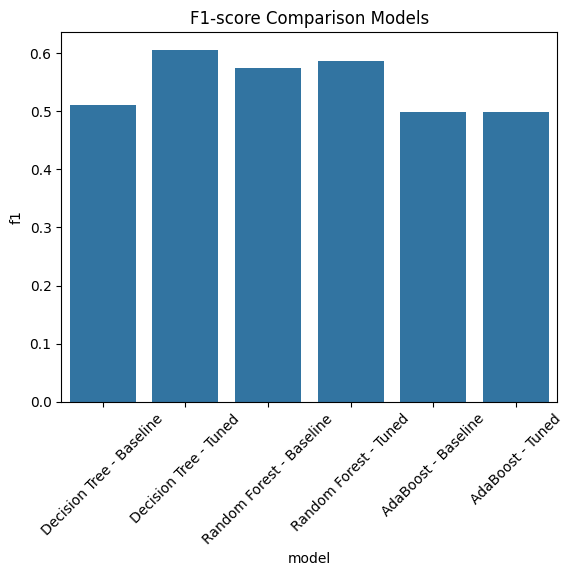

In [14]:
results = pd.DataFrame([res_dt1, res_dt2, res_rf1, res_rf2, res_ab1, res_ab2])
results.set_index('model', inplace=True)
print(results)

sns.barplot(x=results.index, y=results['f1'])
plt.title("F1-score Comparison Models")
plt.xticks(rotation=45)
plt.show()

The best model seems to be a Tuned Decision Tree achieving an f1 score of 0.61. Usually random forests and adaboost perform better but in manyt cases they may not. In this example random forest may benefit from deeper and more trees however the compute time increases much more and there isn't sufficeint computation power so even with the smaller parameters it took longer to perform. And adaboost might be suffering from noise and label imbalance. Before ending of the experiment there is a model called XGBoost which is another boosting tree based algorithm similar to adaboost. It is considered the king of kaggle datasets and usually outperforms the other models.



## Experimenting with XGBoost (The king of kaggle competitions)

In [15]:
from xgboost import XGBClassifier


In [16]:
xgb_baseline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('classifier', XGBClassifier(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=5,
        subsample=0.9,
        random_state=42,
        use_label_encoder=False,
        eval_metric='logloss'
    ))
])

xgb_baseline.fit(X_train, y_train)
res_xgb_base = evaluate_model(xgb_baseline, X_test, y_test, "XGBoost")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [07:45:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== XGBoost Evaluation ===
Accuracy: 0.9204
Precision: 0.6771
Recall: 0.5603
F1-score: 0.6132
AUC-ROC: 0.9548
----------------------------------------


                          accuracy  precision    recall        f1       auc
model                                                                      
Decision Tree - Baseline  0.887715   0.501561  0.519397  0.510323  0.726935
Decision Tree - Tuned     0.920005   0.680054  0.547414  0.606567  0.940069
Random Forest - Baseline  0.918427   0.695719  0.490302  0.575221  0.948741
Random Forest - Tuned     0.920612   0.708207  0.502155  0.587642  0.949760
AdaBoost - Baseline       0.908109   0.646154  0.407328  0.499670  0.935861
AdaBoost - Tuned          0.908109   0.646154  0.407328  0.499670  0.935861
XGBoost                   0.920369   0.677083  0.560345  0.613208  0.954760


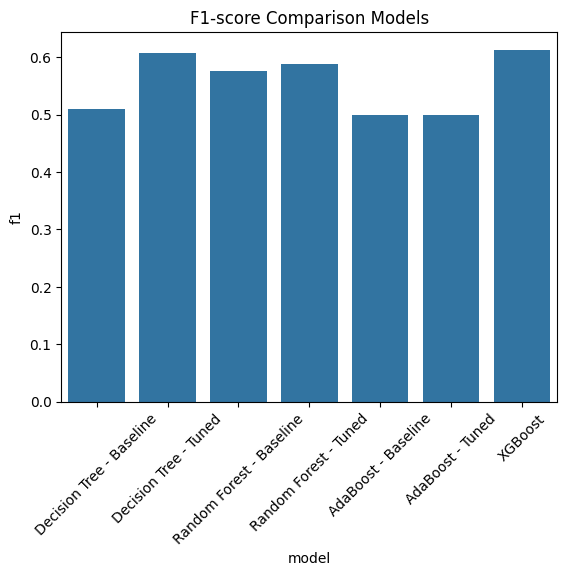

In [17]:
results = pd.DataFrame([res_dt1, res_dt2, res_rf1, res_rf2, res_ab1, res_ab2, res_xgb_base])
results.set_index('model', inplace=True)
print(results)

sns.barplot(x=results.index, y=results['f1'])
plt.title("F1-score Comparison Models")
plt.xticks(rotation=45)
plt.show()

A baseline XGBoost seems to outperform our best model Decision Tree Tuned. Better results can probably achieved by fine tuning the model. XGBoost is a highly optimized gradient boosting algorithm. similarly to adaboost it combines weak learners sequentially but it is much more mathematically and computationally sophisticated and efficient. Each new tree is trained to minimze a loss function by directly computing the gradient from the previous tree. It usually learnes from mistakes more intelligently than adaboost and much more robust to class imbalance. For these reasons and other it makes sense why XGBoost tends to be the king of these kaggle datasets.